<h1><center>TP : Cue4, le robot plus fort que les champions de basket</center></h1>
<img src="https://media.giphy.com/media/bxt40W1QkBh0DQp3em/giphy.gif" 
     width="500"
     height="500"
     style="float:left;margin:10px">

**Cue4** est un robot basketteur construit par l'entreprise japonaise **Toyota**. En 2018, Cue4 est entré dans le Guinness Book des records en réussissant à enchainer 2020 paniers d'affilé. <br>
<br>


<h2><center>Problématique: Comment les ingénieurs de Toyota réussissent-ils à prévoir la trajectoire du ballon ?</center></h2>
<br>
Nous allons voir dans ce TP que la réponse à cette question réside dans <b>la Seconde loi de Newton</b> ...

<h2> PARTIE 1 : MESURE DE LA POSITION INITIALE ET DE LA VITESSE INITIALE DU BALLON </h2>
Dans cette partie, nous allons mesurer : 
<ul>
<li> la position initiale </li>
<li> la vitesse initiale du ballon</li>
</ul>

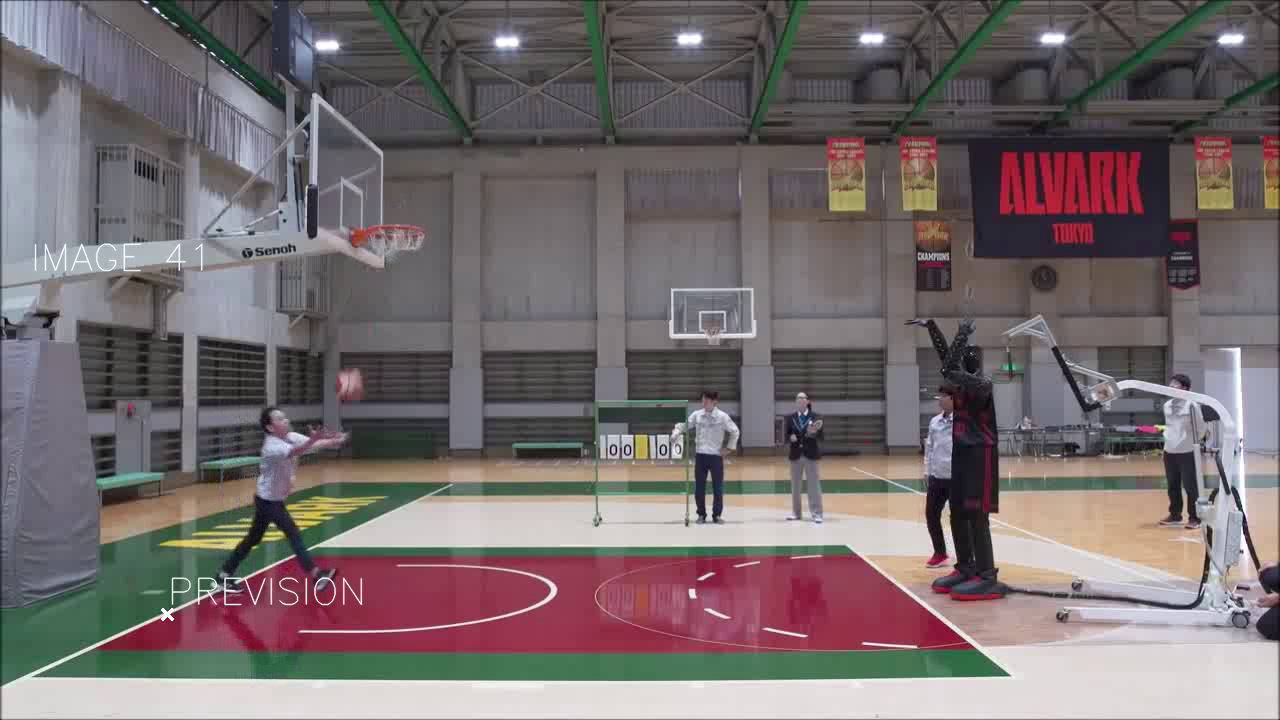

In [12]:
from vecteur import Vecteur
from modelisation import Modelisation
import cv2
import matplotlib.pyplot as plt
plt.close('all')

#On commence par régler les paramètres de base
m = 0.6
g = 9.81
deltat = 0.04
alpha = 0.0
modelisation = Modelisation()

#Ensuite, on règle la position initiale et la vitesse initiale du ballon :
position = Vecteur(8,4)
v = Vecteur(-4.3,5.6)
F = m*Vecteur(0,-g)-alpha*v

#On affiche l'image : 
modelisation.show(position,v)

for i in range(modelisation.nbImages):
    position = position + v*deltat
    v = v + deltat*F/m
    F = m*Vecteur(0,-g)-alpha*v
    modelisation.show(position,v)
